# Описание данных

Данные - специально подготовленная выборка из полного набора, описанного здесь: https://mengtingwan.github.io/data/goodreads#datasets с дополнениями из https://www.kaggle.com/datasets/austinreese/goodreads-books:
- books: перечень книг (~44 тыс.) из списка https://www.goodreads.com/list/show/1.Best_Books_Ever (совпадение по book id),
- interactions: взаимодействие пользователей с книгами

Основной массив данных был собран в конце 2017.

# Инициализация

In [1]:
import logging

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'png'
%config InlineBackend.figure_format = 'retina'

Создаём логгер, который удобен для использования в ноутбуке.

# Load Data

Загружаем данные как они есть, начинаем на них смотреть: какие в них есть сущности, атрибуты, распределения.

In [3]:
books = pd.read_parquet("books.parquet")

In [4]:
books.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43312 entries, 3 to 2360448
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   book_id               43312 non-null  int64  
 1   author                43312 non-null  object 
 2   title                 43312 non-null  object 
 3   description           43312 non-null  object 
 4   genre_and_votes       43312 non-null  object 
 5   num_pages             37001 non-null  Int64  
 6   average_rating        43312 non-null  float64
 7   ratings_count         43312 non-null  Int64  
 8   text_reviews_count    43312 non-null  int64  
 9   publisher             43312 non-null  object 
 10  publication_year      35891 non-null  Int64  
 11  country_code          43312 non-null  object 
 12  language_code         43312 non-null  object 
 13  format                43312 non-null  object 
 14  is_ebook              43312 non-null  bool   
 15  isbn                  

In [ ]:
df=pd.DataFrame(books)
df.describe()

,book_id,num_pages,average_rating,ratings_count,text_reviews_count,publication_year
count,4.331200e+04,37001.0,43312.00000,43312.0,43312.000000,35891.0
mean,8.050797e+06,337.866085,3.99872,13361.85272,637.829239,2006.881084
std,9.315783e+06,256.097045,0.31284,78911.120232,2553.203776,167.257929
min,1.000000e+00,0.0,0.00000,0.0,0.000000,13.0
25%,2.544730e+05,224.0,3.81000,328.0,29.000000,2002.0
50%,3.354695e+06,313.0,4.01000,1834.0,120.000000,2008.0
75%,1.429010e+07,400.0,4.20000,7310.0,435.000000,2012.0
max,3.652450e+07,14777.0,5.00000,4899965.0,142645.000000,20136.0


Пример данных по книгам

In [6]:
print(books[["book_id", "author", "title", "num_pages", "average_rating"]].sample(5, random_state=52).sort_values("book_id").set_index("book_id").to_string())

                                             author                                            title  num_pages  average_rating
book_id                                                                                                                        
69882                 Heinrich Böll, Patrick Bowles                      Billiards at Half-Past Nine        288            3.93
267533                               Robert Cormier                                         8 Plus 1        173            3.67
820966    Martin Luther, J.I. Packer, O.R. Johnston                          The Bondage of the Will        322            4.17
4532622                               Karen Hancock                                      The Enclave        492            3.82
20444381                             Diana Gabaldon  Os tambores de outono - 1ª Parte (Outlander #4)       1048            3.99


In [7]:
interactions = pd.read_parquet("interactions.parquet")

Можно оценить объём данных о взаимодействиях

In [8]:
interactions.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12890434 entries, 0 to 12914458
Data columns (total 7 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   user_id      object
 1   book_id      int64 
 2   started_at   object
 3   read_at      object
 4   is_read      bool  
 5   rating       int64 
 6   is_reviewed  bool  
dtypes: bool(2), int64(2), object(3)
memory usage: 614.7+ MB


Пример данных по взаимодействиям

In [9]:
print(interactions[["user_id", "book_id", "started_at", "read_at", "is_read", "rating"]].sample(5, random_state=52).sort_values("user_id").set_index(["user_id", "book_id"]).to_string())

                                           started_at     read_at  is_read  rating
user_id                          book_id                                          
0447747f44c0d8d1a08cf329fe253f29 10054335  2016-04-08  2016-04-20     True       3
14432756ffba6357686f09e4ccc332bb 26252859  2016-05-27  2016-05-30     True       5
46d6c8cf548d1c86abb671f42ba71b5e 960       2014-08-06  2016-10-29     True       5
71c2b3714945af1f700f49953904c510 18492859  2014-10-09  2014-10-12     True       5
7802bafdeac8abff23a72b9dd60b1dd1 18710190  2015-03-01  2015-05-05     True       4


# EDA

Посмотрим на данные о книгах, какие поля есть.

In [ ]:
books.sample(3).T

,2055963,1360065,1612085
book_id,10954704,906560,34094274
author,Marie Force,Corrie ten Boom,Ryan Schow
title,"Ready for Love (Gansett Island Series, #3)",Tramp for the Lord,Raven (Swann Book 6)
description,For four of the best summers of his young life...,"After her release from a concentration camp, C...",
genre_and_votes,"{'Romance': 200, 'Romance-Contemporary Romance...","{'Christian': 187, 'Biography': 160, 'Nonficti...",{'Fantasy-Fairy Tales': 1}
num_pages,231,<NA>,<NA>
average_rating,4.25,4.47,4.18
ratings_count,6517,17118,11
text_reviews_count,241,277,3
publisher,"HTJB, Inc.",,


Посмотрим на данные о взаимодействиях пользователей с книгами.

In [ ]:
books["book_id"].nunique()

43312

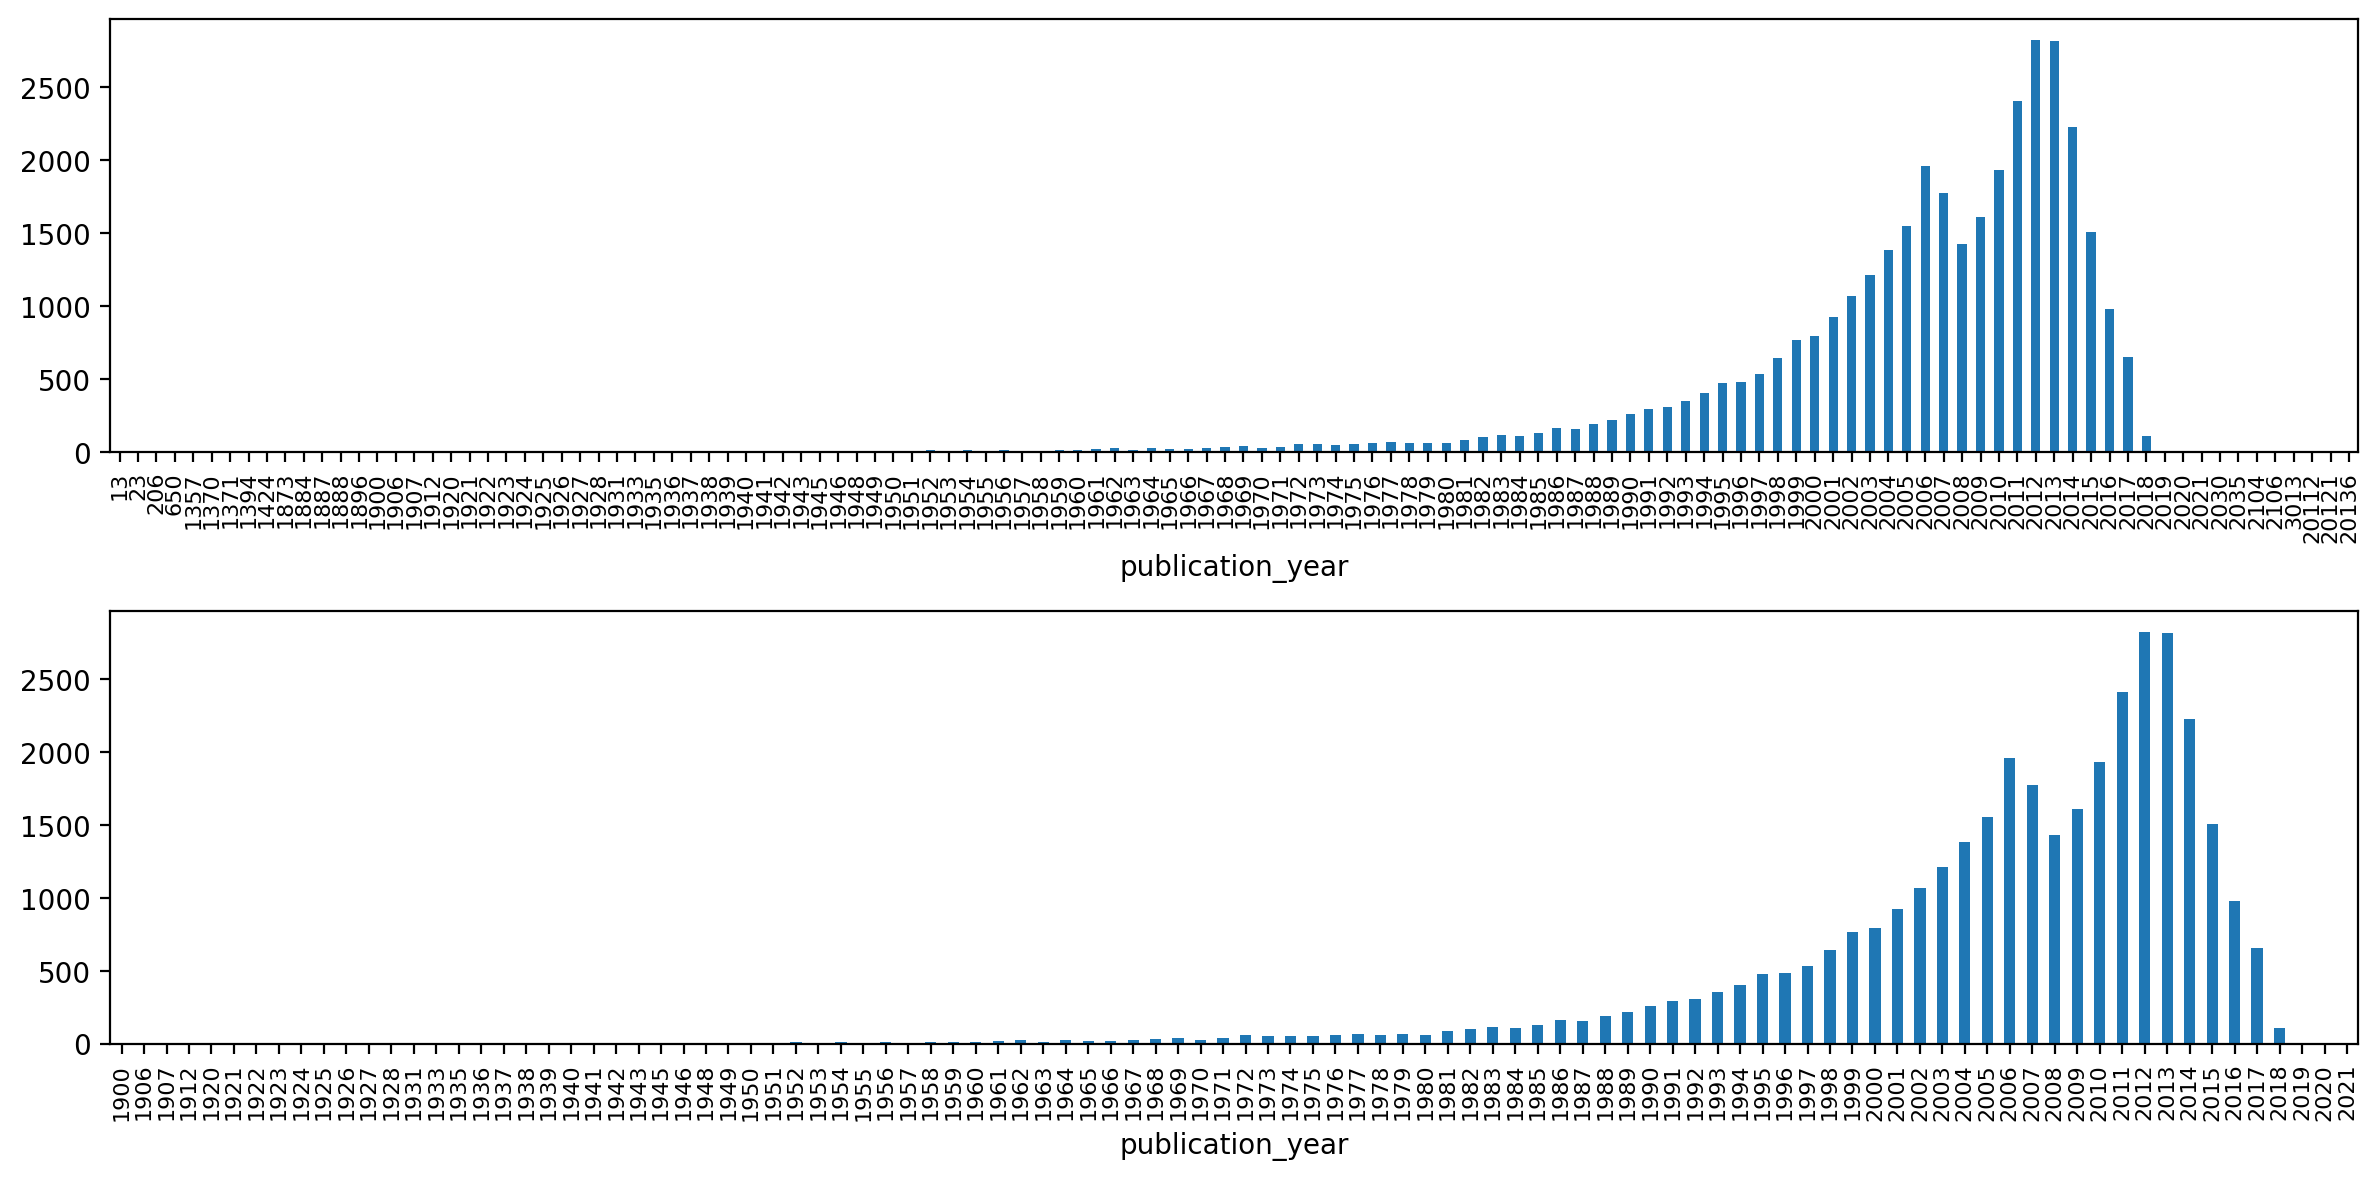

In [12]:
# распределение книг по годам публикации

fig, axs = plt.subplots(2, 1, figsize=(12, 6))

ax = axs[0]
books["publication_year"].value_counts().sort_index().plot(kind="bar", ax=ax)
ax.tick_params(axis='x', labelsize=8)

ax = axs[1]
books.query("publication_year >= 1900 and publication_year <= 2025")["publication_year"].value_counts().sort_index().plot(kind="bar", ax=ax)
ax.tick_params(axis='x', labelsize=8)

fig.tight_layout()

# События по месяцам

In [13]:
from pandas.tseries.offsets import MonthEnd

interactions["started_at_month"] = pd.to_datetime(interactions["started_at"]).dt.to_period('M').dt.to_timestamp().dt.date

In [14]:
interactions_by_month = interactions.groupby("started_at_month").agg(events=("started_at", "count"), users=("user_id", "nunique")).reset_index()

In [15]:
interactions_by_month

,started_at_month,events,users
0,2007-01-01,1993,1071
1,2007-02-01,201,135
2,2007-03-01,222,152
3,2007-04-01,201,135
4,2007-05-01,204,138
...,...,...,...
127,2017-08-01,202129,93040
128,2017-09-01,172187,82694
129,2017-10-01,108107,58076
130,2017-11-01,565,475


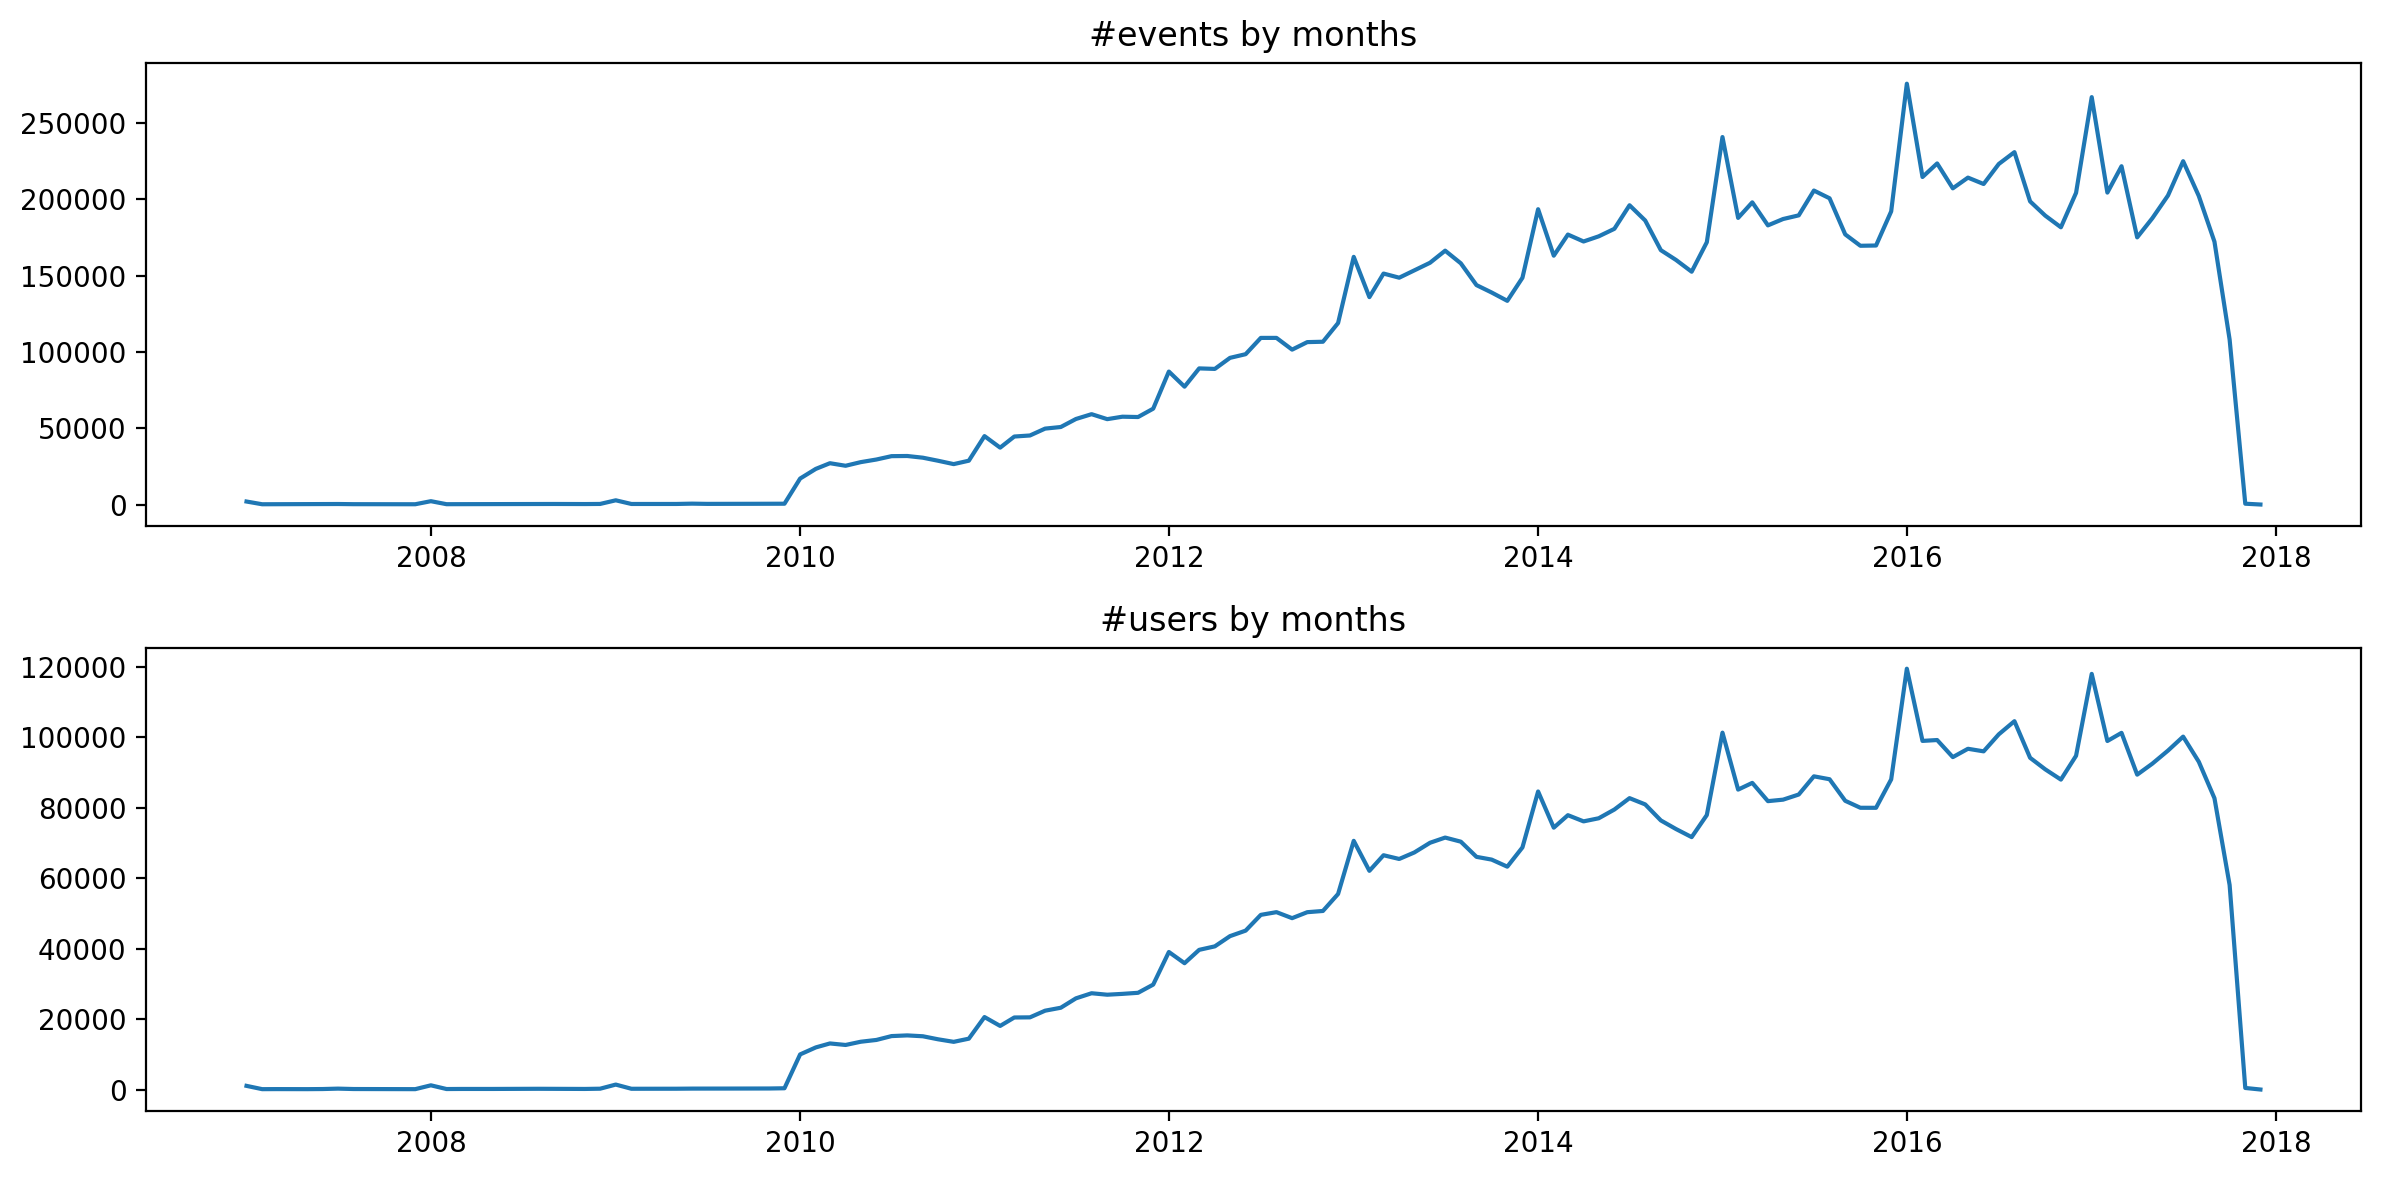

In [16]:
# распределение взаимодействий по годам

fig, axs = plt.subplots(2, 1, figsize=(12, 6))

ax = axs[0]
ax.plot(interactions_by_month["started_at_month"], interactions_by_month["events"])
# ax.tick_params(axis='x', labelsize=8)
ax.set_title("#events by months")

ax = axs[1]
ax.plot(interactions_by_month["started_at_month"], interactions_by_month["users"])
# ax.tick_params(axis='x', labelsize=8)
ax.set_title("#users by months")

fig.tight_layout()

# Предобработка

Примем новые именования:
- books -> items (более обобщённое название)
- interactions -> events (несколько короче, удобнее в коде)

In [17]:
items = books.copy()
events = interactions.copy()

In [ ]:
%whos DataFrame #объекты в оперативной памяти


Variable                Type         Data/Info
----------------------------------------------
books                   DataFrame              book_id        <...>[43312 rows x 19 columns]
df                      DataFrame              book_id        <...>[43312 rows x 19 columns]
events                  DataFrame                             <...>2890434 rows x 8 columns]
interactions            DataFrame                             <...>2890434 rows x 8 columns]
interactions_by_month   DataFrame        started_at_month  eve<...>n\n[132 rows x 3 columns]
items                   DataFrame              book_id        <...>[43312 rows x 19 columns]


In [19]:
del books
del interactions
#del interactions_by_month

In [ ]:
%whos DataFrame #объекты в оперативной памяти

Variable                Type         Data/Info
----------------------------------------------
df                      DataFrame              book_id        <...>[43312 rows x 19 columns]
events                  DataFrame                             <...>2890434 rows x 8 columns]
interactions_by_month   DataFrame        started_at_month  eve<...>n\n[132 rows x 3 columns]
items                   DataFrame              book_id        <...>[43312 rows x 19 columns]


In [21]:
# Шаг1 - оставим события только до ноября 2017

event_cutoff_date = pd.to_datetime("2017-11-01").date()
events = events.query("started_at < @event_cutoff_date and read_at < @event_cutoff_date").copy()

In [22]:
# шаг 2 - удаление событий без рейтинга

events = events[events['rating'] != 0]

In [23]:
# Шаг 3: Оставить только события с признаком is_read=True
events = events[events['is_read'] == True]

In [24]:
# Шаг 4: Оставить только пользователей, у которых две и более прочитанные книги - быстро
user_counts = events['user_id'].value_counts()
valid_users = user_counts[user_counts >= 2].index
events = events[events['user_id'].isin(valid_users)]

In [25]:
# Шаг 4: Оставить только пользователей, у которых две и более прочитанные книги - медленно
events.groupby('user_id').filter(lambda x:x['book_id'].count()>=2)

,user_id,book_id,started_at,read_at,is_read,rating,is_reviewed,started_at_month
0,8842281e1d1347389f2ab93d60773d4d,22034,2015-07-12,2015-07-17,True,5,False,2015-07-01
1,8842281e1d1347389f2ab93d60773d4d,22318578,2015-06-07,2015-08-09,True,5,True,2015-06-01
2,8842281e1d1347389f2ab93d60773d4d,22551730,2015-06-24,2015-07-11,True,4,True,2015-06-01
3,8842281e1d1347389f2ab93d60773d4d,22816087,2015-09-27,2015-11-04,True,5,True,2015-09-01
5,8842281e1d1347389f2ab93d60773d4d,17910054,2015-03-04,2015-07-28,True,3,False,2015-03-01
...,...,...,...,...,...,...,...,...
12914452,d890e8079d8896e0cc6c4f178634850a,5297,2017-02-07,2017-02-26,True,5,False,2017-02-01
12914453,d890e8079d8896e0cc6c4f178634850a,4900,2016-12-22,2016-12-29,True,2,False,2016-12-01
12914454,d890e8079d8896e0cc6c4f178634850a,14836,2016-11-29,2017-01-15,True,3,False,2016-11-01
12914456,b0883ebf8e31731f1c5d91e678c26666,10210,2012-06-05,2013-01-17,True,5,False,2012-06-01


In [26]:
# Шаг 5: Переименование столбцов и таблиц
items.rename(columns={'book_id': 'item_id'}, inplace=True)
events.rename(columns={'book_id': 'item_id'}, inplace=True)

In [27]:
# Шаг 6: Перекодировка идентификаторов пользователей в числовой вид
unique_user_ids = sorted(events['user_id'].unique())
user_id_mapping = {old_id: new_id for new_id, old_id in enumerate(unique_user_ids, start=1000000)}

# Применение новой кодировки к данным
events['user_id'] = events['user_id'].map(user_id_mapping)

In [28]:
events.head(2).T

,0,1
user_id,1229132,1229132
item_id,22034,22318578
started_at,2015-07-12,2015-06-07
read_at,2015-07-17,2015-08-09
is_read,True,True
rating,5,5
is_reviewed,False,True
started_at_month,2015-07-01,2015-06-01


# Разделение

In [ ]:
events.head()

,user_id,item_id,started_at,read_at,is_read,rating,is_reviewed,started_at_month
0,1229132,22034,2015-07-12,2015-07-17,True,5,False,2015-07-01
1,1229132,22318578,2015-06-07,2015-08-09,True,5,True,2015-06-01
2,1229132,22551730,2015-06-24,2015-07-11,True,4,True,2015-06-01
3,1229132,22816087,2015-09-27,2015-11-04,True,5,True,2015-09-01
5,1229132,17910054,2015-03-04,2015-07-28,True,3,False,2015-03-01


In [ ]:
items.head()

,item_id,author,title,description,genre_and_votes,num_pages,average_rating,ratings_count,text_reviews_count,publisher,publication_year,country_code,language_code,format,is_ebook,isbn,isbn13,genre_and_votes_dict,genre_and_votes_str
3,6066819,Jennifer Weiner,Best Friends Forever,Addie Downs and Valerie Adler were eight when ...,"{'Womens Fiction-Chick Lit': 739, 'Fiction': 442}",368,3.49,51184,3282,Atria Books,2009,US,eng,Hardcover,False,0743294297,9780743294294,"{'Academic': None, 'Academic-Academia': None, ...","Womens Fiction-Chick Lit 739, Fiction 442"
6,378460,Michael Halberstam,The Wanting of Levine,,"{'Politics': 1, 'Humor': 1}",<NA>,4.38,12,4,Berkley Publishing Group,1979,US,,Paperback,False,0425040887,9780425040881,"{'Academic': None, 'Academic-Academia': None, ...","Politics 1user, Humor 1user"
15,89375,"Don Piper, Cecil Murphey",90 Minutes in Heaven: A True Story of Death an...,As he is driving home from a minister's confer...,"{'Christian': 395, 'Nonfiction': 392, 'Religio...",<NA>,3.91,68157,2885,,<NA>,US,,,False,0800759494,9780800759490,"{'Academic': None, 'Academic-Academia': None, ...","Christian 395, Nonfiction 392, Religion 142, S..."
16,89376,Randy Alcorn,Heaven,What is Heaven really going to be like? What w...,"{'Christian': 225, 'Religion-Theology': 154, '...",533,4.26,7345,566,,<NA>,US,eng,,False,0842379428,9780842379427,"{'Academic': None, 'Academic-Academia': None, ...","Christian 225, Religion-Theology 154, Nonficti..."
17,89377,Jennifer L. Holm,Penny from Heaven,It's 1953 and 11-year-old Penny dreams of a su...,"{'Historical-Historical Fiction': 284, 'Childr...",288,3.98,6949,615,Random House Books for Young Readers,2006,US,,Hardcover,False,037583687X,9780375836879,"{'Academic': None, 'Academic-Academia': None, ...","Historical-Historical Fiction 284, Childrens-M..."


In [31]:
# зададим точку разбиения
train_test_global_time_split_date = pd.to_datetime("2017-08-01").date()

In [32]:
train_test_global_time_split_idx = events["started_at"] < train_test_global_time_split_date
events_train = events[train_test_global_time_split_idx]
events_test = events[~train_test_global_time_split_idx]

In [33]:
# количество пользователей в train и test
users_train = events_train["user_id"].drop_duplicates()
users_test = events_test["user_id"].drop_duplicates()

In [34]:
# количество пользователей, которые есть и в train, и в test
common_users = set(users_train) & set(users_test)

In [35]:
print(len(users_train), len(users_test), len(common_users))

428220 123223 120858


In [36]:
cold_users = set(users_test) - set(users_train)

print(len(cold_users))

2365


# Популярные

Завершите код, чтобы получить топ-100 наиболее популярных книг согласно условиям выше.

In [37]:
top_pop_start_date = pd.to_datetime("2015-01-01").date()

item_popularity = events_train \
    .query("started_at >= @top_pop_start_date") \
    .groupby(["item_id"]).agg(users=("user_id", "nunique"), avg_rating=("rating", "mean")).reset_index()
item_popularity["popularity_weighted"] = item_popularity["users"] * item_popularity["avg_rating"]

# сортируем по убыванию взвешенной популярности
item_popularity = item_popularity.sort_values(by="popularity_weighted", ascending=False)

# выбираем первые 100 айтемов со средней оценкой avg_rating не меньше 4
top_k_pop_items = item_popularity.query("avg_rating >= 4").head(100)

In [38]:
top_item_users_count = top_k_pop_items.iloc[0]["users"]
print(top_item_users_count)

20207.0


In [39]:
# добавляем информацию о книгах
top_k_pop_items = top_k_pop_items.merge(
    items.set_index("item_id")[["author", "title", "genre_and_votes", "publication_year"]], on="item_id")

#with pd.option_context('display.max_rows', 100):
#    display(top_k_pop_items[["item_id", "author", "title", "publication_year", "users", "avg_rating", "popularity_weighted", "genre_and_votes"]])


In [40]:
# Завершите предлагаемый код, чтобы в cold_users_events_with_recs для каждого события получить столбец avg_rating. 
# В нём при совпадении по item_id будет значение из одноимённого столбца из top_k_pop_items, иначе — пропуск.

cold_users_events_with_recs = \
    events_test[events_test["user_id"].isin(cold_users)] \
    .merge(top_k_pop_items[["item_id", "avg_rating"]], on="item_id", how="left")

cold_user_items_no_avg_rating_idx = cold_users_events_with_recs["avg_rating"].isnull()
cold_user_recs = cold_users_events_with_recs[~cold_user_items_no_avg_rating_idx] \
    [["user_id", "item_id", "rating", "avg_rating"]]

In [41]:
cold_user_recs.head(3)

,user_id,item_id,rating,avg_rating
2,1361610,25899336,4,4.427261
5,1338996,16096824,5,4.301014
8,1338996,18692431,5,4.071454


In [42]:
# Вычисляем количество событий, где рекомендации совпали (где avg_rating не является NaN)
matching_events_count = len(cold_users_events_with_recs[~cold_users_events_with_recs["avg_rating"].isnull()])

# Общее количество событий для холодных пользователей
total_cold_user_events = len(cold_users_events_with_recs)

# Вычисляем долю совпадений
matching_ratio = matching_events_count / total_cold_user_events

# Округляем до сотых и выводим результат
matching_ratio_rounded = round(matching_ratio, 2)
print(matching_ratio_rounded)

0.2


Посчитайте метрики rmse и mae для полученных рекомендаций.

In [43]:
# посчитаем метрики рекомендаций
from sklearn.metrics import mean_squared_error, mean_absolute_error

rmse = mean_squared_error(cold_user_recs["rating"], cold_user_recs["avg_rating"], squared=False)
mae = mean_absolute_error(cold_user_recs["rating"], cold_user_recs["avg_rating"])

print(round(rmse, 2), round(mae, 2))

0.78 0.62


In [44]:
# посчитаем покрытие холодных пользователей рекомендациями
cold_users_hit_ratio = cold_users_events_with_recs.groupby("user_id").agg(hits=("avg_rating", lambda x: (~x.isnull()).mean()))

print(f"Доля пользователей без релевантных рекомендаций: {(cold_users_hit_ratio == 0).mean().iat[0]:.2f}")
print(f"Среднее покрытие пользователей: {cold_users_hit_ratio[cold_users_hit_ratio != 0].mean().iat[0]:.2f}")

Доля пользователей без релевантных рекомендаций: 0.59
Среднее покрытие пользователей: 0.44


# Матрица взаимодействий и первые персональные рекомендации

In [45]:
%whos DataFrame #объекты в оперативной памяти

Variable                      Type         Data/Info
----------------------------------------------------
cold_user_recs                DataFrame          user_id   item_id  <...>\n[1912 rows x 4 columns]
cold_users_events_with_recs   DataFrame          user_id   item_id  <...>\n[9672 rows x 9 columns]
cold_users_hit_ratio          DataFrame                 hits\nuser_i<...>\n[2365 rows x 1 columns]
df                            DataFrame              book_id        <...>[43312 rows x 19 columns]
events                        DataFrame              user_id   item_<...>1751086 rows x 8 columns]
events_test                   DataFrame              user_id   item_<...>[424962 rows x 8 columns]
events_train                  DataFrame              user_id   item_<...>1326124 rows x 8 columns]
interactions_by_month         DataFrame        started_at_month  eve<...>n\n[132 rows x 3 columns]
item_popularity               DataFrame            item_id  users  a<...>n[38914 rows x 4 columns]
ite

Оцените степень разреженности U-I-матрицы, построенной на основе events. Используйте формулу выше и данные events[['user_id', 'item_id', 'rating']]

In [46]:
# Считаем количество уникальных пользователей и уникальных айтемов
num_users = events["user_id"].nunique()
num_items = events["item_id"].nunique()

# Считаем количество ненулевых ячеек (уникальных пар пользователь-айтем)
num_nonzero_entries = len(events)

# Считаем общее количество ячеек в U-I-матрице
total_entries = num_users * num_items

# Вычисляем степень разреженности
sparsity = 1 - (num_nonzero_entries / total_entries)

# Выводим степень разреженности
print(round(sparsity, 4))

0.9993


Реализация SVD-алгоритма

In [47]:
from surprise import Dataset, Reader
from surprise import SVD

# используем Reader из библиотеки surprise для преобразования событий (events)
# в формат, необходимый surprise
reader = Reader(rating_scale=(1, 5))
surprise_train_set = Dataset.load_from_df(events_train[['user_id', 'item_id', 'rating']], reader)
surprise_train_set = surprise_train_set.build_full_trainset()

# инициализируем модель
svd_model = SVD(n_factors=100, random_state=0)

# обучаем модель
svd_model.fit(surprise_train_set)

In [48]:
surprise_test_set = list(events_test[['user_id', 'item_id', 'rating']].itertuples(index=False))

# получаем рекомендации для тестовой выборки
svd_predictions = svd_model.test(surprise_test_set)

In [49]:
#surprise_test_set

In [50]:
from surprise import accuracy

rmse = accuracy.rmse(svd_predictions)
mae = accuracy.mae(svd_predictions)
                     
print(rmse, mae)

RMSE: 0.8289
MAE:  0.6474
0.8288711689059135 0.647437483750257


Проверка метрик на адекватность

In [51]:
from surprise import NormalPredictor

# инициализируем состояние генератора, это необходимо для получения
# одной и той же последовательности случайных чисел, только в учебных целях
np.random.seed(0)

random_model = NormalPredictor()

random_model.fit(surprise_train_set)
random_predictions = random_model.test(surprise_test_set)

In [52]:
from surprise import accuracy
import numpy as np

# Рассчитаем MAE для случайных рекомендаций
random_mae = accuracy.mae(random_predictions)

# Рассчитываем разницу в процентах между MAE от случайных рекомендаций и MAE от SVD
mae_percentage_increase = ((random_mae - mae) / mae) * 100

# Округляем MAE и процентное увеличение
random_mae_rounded = round(random_mae, 2)
mae_percentage_increase_rounded = round(mae_percentage_increase, 1)

print(random_mae_rounded, mae_percentage_increase_rounded)

MAE:  1.0018
1.0 54.7


Факультатив - Удалите из events события для редких айтемов — таких, с которыми взаимодействовало менее N пользователей.

In [53]:
events_train2=events_train.groupby('item_id').filter(lambda x:x['user_id'].nunique()>=5)

In [54]:
#удалено
len(set(events_train['item_id'])-set(events_train2['item_id']))

5632

In [55]:
round(len(set(events_train['item_id'])-set(events_train2['item_id']))/len(events_train),5)

0.0005

повторим расчеты SVD алгоритма - посмотрим на скорость и качество расчетов

In [56]:
from surprise import Dataset, Reader
from surprise import SVD

# используем Reader из библиотеки surprise для преобразования событий (events)
# в формат, необходимый surprise
reader = Reader(rating_scale=(1, 5))
surprise_train_set = Dataset.load_from_df(events_train2[['user_id', 'item_id', 'rating']], reader)
surprise_train_set = surprise_train_set.build_full_trainset()

# инициализируем модель
svd_model = SVD(n_factors=100, random_state=0)

# обучаем модель
svd_model.fit(surprise_train_set)

In [86]:
#не так, грохнул холодных
#items_filtered=events_train2['item_id'].index

items_to_del=set(events_train['item_id'].unique())-set(events_train2['item_id'].unique())
#items_to_del

In [85]:
#events_test2 - надо отфильтровать по item_id
#events_test2=events_test[events_test['item_id'].isin(items_filtered)]
check=events_test[events_test['item_id'].isin(items_to_del)==True]

In [89]:
check.head(3)

,user_id,item_id,started_at,read_at,is_read,rating,is_reviewed,started_at_month
355,1003162,33807229,2017-08-26,2017-08-28,True,4,True,2017-08-01
359,1003162,35234740,2017-08-03,2017-08-04,True,4,True,2017-08-01
363,1003162,32854499,2017-09-16,2017-09-20,True,4,True,2017-09-01


In [88]:
events_train[events_train['item_id'].isin([33807229,35234740,32854499])]

,user_id,item_id,started_at,read_at,is_read,rating,is_reviewed,started_at_month
521249,1148829,35234740,2017-07-26,2017-07-27,True,5,False,2017-07-01
1652004,1264462,33807229,2017-07-27,2017-08-29,True,4,True,2017-07-01
3334132,1164015,35234740,2017-07-27,2017-07-30,True,4,True,2017-07-01
3630650,1234290,33807229,2017-01-01,2017-01-01,True,3,False,2017-01-01
7649525,1388331,32854499,2017-07-25,2017-07-25,True,5,True,2017-07-01
9925467,1076200,35234740,2017-07-27,2017-07-27,True,5,False,2017-07-01
11778300,1313051,35234740,2017-07-29,2017-07-30,True,4,True,2017-07-01


In [90]:
events_test2=events_test[events_test['item_id'].isin(items_to_del)==False]

In [91]:
surprise_test_set = list(events_test2[['user_id', 'item_id', 'rating']].itertuples(index=False))

# получаем рекомендации для тестовой выборки
svd_predictions = svd_model.test(surprise_test_set)

In [92]:
from surprise import accuracy

rmse = accuracy.rmse(svd_predictions)
mae = accuracy.mae(svd_predictions)
                     
print(rmse, mae)

RMSE: 0.8276
MAE:  0.6458
0.8275624491138864 0.6458244820541088


Создайте функцию, которая позволит получить рекомендации для конкретного пользователя, используя описанный подход. 

In [102]:
def get_recommendations_svd(user_id, all_items, events, model, include_seen=True, n=5):
    """ возвращает n рекомендаций для user_id """
    
    # получим список идентификаторов всех книг
    all_items = set(events['item_id'].unique())
        
    # учитываем флаг, стоит ли уже прочитанные книги включать в рекомендации
    if include_seen:
        items_to_predict = list(all_items)
    else:
        # получим список книг, которые пользователь уже прочитал ("видел")
        seen_items = set(events[events['user_id'] == user_id]['item_id'].unique())
        
        # книги, которые пользователь ещё не читал
        # только их и будем включать в рекомендации
        items_to_predict = list(all_items - seen_items)
    
    # получаем скоры для списка книг, т. е. рекомендации
    predictions = [model.predict(user_id, item_id) for item_id in items_to_predict]
    
    # сортируем рекомендации по убыванию скора и берём только n первых
    recommendations = sorted(predictions, key=lambda x: x.est, reverse=True)[:n]
    
    return pd.DataFrame([(pred.iid, pred.est) for pred in recommendations], columns=["item_id", "score"])

In [103]:
get_recommendations_svd(1296647, items, events_train, svd_model)

,item_id,score
0,2939264,5.000000
1,11221285,5.000000
2,59715,4.991016
3,24812,4.973165
4,29844341,4.955027


In [104]:
# выберем произвольного пользователя из тренировочной выборки ("прошлого")
user_id = events_train['user_id'].sample().iat[0]

print(f"user_id: {user_id}")

print("История (последние события, recent)")
user_history = (
    events_train
    .query("user_id == @user_id")
    .merge(items.set_index("item_id")[["author", "title", "genre_and_votes"]], on="item_id")
)
user_history_to_print = user_history[["author", "title", "started_at", "read_at", "rating", "genre_and_votes"]].tail(10)
display(user_history_to_print)

print("Рекомендации")
user_recommendations = get_recommendations_svd(user_id, items, events_train, svd_model)
user_recommendations = user_recommendations.merge(items[["item_id", "author", "title", "genre_and_votes"]], on="item_id")
display(user_recommendations)

user_id: 1349218
История (последние события, recent)


,author,title,started_at,read_at,rating,genre_and_votes
53,Kimberly Derting,"The Body Finder (The Body Finder, #1)",2011-03-19,2011-03-20,4,"{'Young Adult': 1320, 'Fantasy-Paranormal': 93..."
54,April Lindner,Jane,2011-06-03,2011-06-06,5,"{'Young Adult': 434, 'Romance': 340, 'Retellin..."
55,Cynthia Hand,"Unearthly (Unearthly, #1)",2011-05-18,2011-05-24,5,"{'Young Adult': 2318, 'Fantasy': 1933, 'Parano..."
56,Cassandra Clare,"Clockwork Prince (The Infernal Devices, #2)",2012-01-21,2012-02-05,5,"{'Fantasy': 7212, 'Young Adult': 5170, 'Romanc..."
57,"Orson Scott Card, Stefan Rudnicki, Harlan Ellison","Ender's Game (Ender's Saga, #1)",2011-10-07,2011-10-21,5,"{'Science Fiction': 15315, 'Fiction': 7488, 'Y..."
58,Suzanne Collins,"The Hunger Games (The Hunger Games, #1)",2011-11-20,2011-11-20,5,"{'Young Adult': 30042, 'Fiction': 16754, 'Scie..."
59,Ally Condie,"Matched (Matched, #1)",2011-12-14,2011-12-30,4,"{'Young Adult': 7846, 'Science Fiction-Dystopi..."
60,Alex Flinn,"Beastly (Beastly, #1; Kendra Chronicles, #1)",2011-03-11,2011-03-11,4,"{'Young Adult': 2672, 'Fantasy': 2570, 'Romanc..."
61,Stephenie Meyer,"The Host (The Host, #1)",2011-03-30,2011-04-02,5,"{'Young Adult': 4380, 'Science Fiction': 4168,..."
62,Sara Gruen,Water for Elephants,2011-04-28,2011-05-03,5,"{'Fiction': 9703, 'Historical-Historical Ficti..."


Рекомендации


,item_id,score,author,title,genre_and_votes
0,1,5,J.K. Rowling,Harry Potter and the Half-Blood Prince (Harry ...,"{'Fantasy': 46400, 'Young Adult': 15083, 'Fict..."
1,2,5,"J.K. Rowling, Mary GrandPré",Harry Potter and the Order of the Phoenix (Har...,"{'Fantasy': 46485, 'Young Adult': 15194, 'Fict..."
2,3,5,"J.K. Rowling, Mary GrandPré",Harry Potter and the Sorcerer's Stone (Harry P...,"{'Fantasy': 59818, 'Fiction': 17918, 'Young Ad..."
3,5,5,"J.K. Rowling, Mary GrandPré",Harry Potter and the Prisoner of Azkaban (Harr...,"{'Fantasy': 49784, 'Young Adult': 15393, 'Fict..."
4,6,5,"J.K. Rowling, Mary GrandPré",Harry Potter and the Goblet of Fire (Harry Pot...,"{'Fantasy': 48257, 'Young Adult': 15483, 'Fict..."


In [ ]:
# items.to_parquet("./data/items.parquet")
# events.to_parquet("./data/events.parquet")

# Коллаборативная фильтрация: ALS

In [40]:
import sklearn.preprocessing

import warnings
warnings.filterwarnings("ignore")

In [41]:
# перекодируем идентификаторы пользователей:
# из имеющихся в последовательность 0, 1, 2, ...
user_encoder = sklearn.preprocessing.LabelEncoder()
user_encoder.fit(events["user_id"])
events_train["user_id_enc"] = user_encoder.transform(events_train["user_id"])
events_test["user_id_enc"] = user_encoder.transform(events_test["user_id"])

# перекодируем идентификаторы объектов:
# из имеющихся в последовательность 0, 1, 2, ...
item_encoder = sklearn.preprocessing.LabelEncoder()
item_encoder.fit(items["item_id"])
items["item_id_enc"] = item_encoder.transform(items["item_id"])
events_train["item_id_enc"] = item_encoder.transform(events_train["item_id"])
events_test["item_id_enc"] = item_encoder.transform(events_test["item_id"])

In [42]:
print(events_train["item_id_enc"].max())

43304


In [43]:
# Получаем количество уникальных пользователей и объектов
num_users = events_train["user_id_enc"].nunique()
num_items = events_train["item_id_enc"].nunique()

# Вычисляем размер матрицы в байтах (1 байт на элемент)
matrix_size_bytes = num_users * num_items

# Переводим размер в гигабайты
matrix_size_gb = matrix_size_bytes / (1024 ** 3)

# Отбрасываем дробную часть и выводим целое число
matrix_size_gb_int = int(matrix_size_gb)

In [44]:
print(matrix_size_gb_int)

16


In [46]:
import scipy

# создаём sparse-матрицу формата CSR 
user_item_matrix_train = scipy.sparse.csr_matrix((
    events_train["rating"],
    (events_train['user_id_enc'], events_train['item_id_enc'])),
    dtype=np.int8)

In [48]:
import sys
matrix_size_gb_2 = sum([sys.getsizeof(i) for i in user_item_matrix_train.data]) / 1024 ** 3

print(matrix_size_gb_2)

0.26370687410235405


Имея подготовленную матрицу взаимодействий, перейдём к третьему шагу — создадим ALS-модель. Для примера возьмём количество латентных факторов для матриц , равным 50. Выполните код для создания и тренировки модели.

In [49]:
# создание и тренировка модели

from implicit.als import AlternatingLeastSquares

als_model = AlternatingLeastSquares(factors=50, iterations=50, regularization=0.05, random_state=0)
als_model.fit(user_item_matrix_train) 

100%|██████████| 50/50 [03:36<00:00,  4.33s/it]


Чтобы получить рекомендации для пользователя с помощью модели ALS, используем такую функцию:

In [50]:
def get_recommendations_als(user_item_matrix, model, user_id, user_encoder, item_encoder, include_seen=True, n=5):
    """
    Возвращает отранжированные рекомендации для заданного пользователя
    """
    user_id_enc = user_encoder.transform([user_id])[0]
    recommendations = model.recommend(
         user_id_enc, 
         user_item_matrix[user_id_enc], 
         filter_already_liked_items=not include_seen,
         N=n)
    recommendations = pd.DataFrame({"item_id_enc": recommendations[0], "score": recommendations[1]})
    recommendations["item_id"] = item_encoder.inverse_transform(recommendations["item_id_enc"])
    
    return recommendations

In [51]:
# получаем список всех возможных user_id (перекодированных)
user_ids_encoded = range(len(user_encoder.classes_))

# получаем рекомендации для всех пользователей
als_recommendations = als_model.recommend(
    user_ids_encoded,
    user_item_matrix_train[user_ids_encoded],
    filter_already_liked_items=False, N=100)

Код возвращает рекомендации как список списков, это не очень удобно. Преобразуем его в более удобный формат — табличный.

In [52]:
# преобразуем полученные рекомендации в табличный формат
item_ids_enc = als_recommendations[0]
als_scores = als_recommendations[1]

als_recommendations = pd.DataFrame({
    "user_id_enc": user_ids_encoded,
    "item_id_enc": item_ids_enc.tolist(),
    "score": als_scores.tolist()})
als_recommendations = als_recommendations.explode(["item_id_enc", "score"], ignore_index=True)

# приводим типы данных
als_recommendations["item_id_enc"] = als_recommendations["item_id_enc"].astype("int")
als_recommendations["score"] = als_recommendations["score"].astype("float")

# получаем изначальные идентификаторы
als_recommendations["user_id"] = user_encoder.inverse_transform(als_recommendations["user_id_enc"])
als_recommendations["item_id"] = item_encoder.inverse_transform(als_recommendations["item_id_enc"])
als_recommendations = als_recommendations.drop(columns=["user_id_enc", "item_id_enc"])

In [75]:
als_recommendations = als_recommendations[["user_id", "item_id", "score"]]
als_recommendations.to_parquet("./data/als_recommendations.parquet")

In [76]:
als_recommendations = (
    als_recommendations.merge(events_test[["user_id", "item_id", "rating"]]
               .rename(columns={"rating": "rating_test"}), 
           on=["user_id", "item_id"], how="left")
) 

Сохраним полученные рекомендации в файл, они ещё нам пригодятся.

In [77]:
import sklearn.metrics

def compute_ndcg(rating: pd.Series, score: pd.Series, k):
    """ подсчёт ndcg
    rating: истинные оценки
    score: оценки модели
    k: количество айтемов (по убыванию score) для оценки, остальные - отбрасываются
    """

    # если кол-во объектов меньше 2, то NDCG - не определена
    if len(rating) < 2:
        return np.nan

    ndcg = sklearn.metrics.ndcg_score(np.asarray([rating.to_numpy()]), np.asarray([score.to_numpy()]), k=k)

    return ndcg

In [85]:
#полезно
als_recommendations[~als_recommendations['rating_test'].isnull()]

,user_id,item_id,score,rating_test
611,1000006,18774964,0.367940,4.0
615,1000006,29868610,0.289370,4.0
633,1000006,7445,0.229146,4.0
664,1000006,18812405,0.162832,3.0
687,1000006,24817626,0.136432,3.0
...,...,...,...,...
43056981,1430569,28763485,0.225379,5.0
43057389,1430573,1618,0.100608,4.0
43057861,1430578,17061,0.613498,5.0
43057873,1430578,830502,0.570653,5.0


In [86]:
rating_test_idx = ~als_recommendations["rating_test"].isnull()
ndcg_at_5_scores = als_recommendations[rating_test_idx].groupby("user_id").apply(
    lambda x: compute_ndcg(x["rating_test"], x["score"], k=5))


In [87]:
print(ndcg_at_5_scores.mean())

0.975946709792109


# Контентные рекоммендации

# 2 стадийный подход

# Прочее

In [44]:
def get_recommendations_als(user_item_matrix, model, user_id, user_encoder, item_encoder, include_seen=True, n=5):
    """
    Возвращает отранжированные рекомендации для заданного пользователя
    """
    user_id_enc = user_encoder.transform([user_id])[0]
    recommendations = model.recommend(
         user_id_enc, 
         user_item_matrix[user_id_enc], 
         filter_already_liked_items=not include_seen,
         N=n)
    recommendations = pd.DataFrame({"item_id_enc": recommendations[0], "score": recommendations[1]})
    recommendations["item_id"] = item_encoder.inverse_transform(recommendations["item_id_enc"])
    
    return recommendations

In [45]:
# получаем список всех возможных user_id (перекодированных)
user_ids_encoded = range(len(user_encoder.classes_))

# получаем рекомендации для всех пользователей
als_recommendations = als_model.recommend(
    user_ids_encoded, 
    user_item_matrix_train[user_ids_encoded], 
    filter_already_liked_items=False, N=100)

In [46]:
# преобразуем полученные рекомендации в табличный формат
item_ids_enc = als_recommendations[0]
als_scores = als_recommendations[1]

als_recommendations = pd.DataFrame({
    "user_id_enc": user_ids_encoded,
    "item_id_enc": item_ids_enc.tolist(), 
    "score": als_scores.tolist()})
als_recommendations = als_recommendations.explode(["item_id_enc", "score"], ignore_index=True)

# приводим типы данных
als_recommendations["item_id_enc"] = als_recommendations["item_id_enc"].astype("int")
als_recommendations["score"] = als_recommendations["score"].astype("float")

# получаем изначальные идентификаторы
als_recommendations["user_id"] = user_encoder.inverse_transform(als_recommendations["user_id_enc"])
als_recommendations["item_id"] = item_encoder.inverse_transform(als_recommendations["item_id_enc"])
als_recommendations = als_recommendations.drop(columns=["user_id_enc", "item_id_enc"])

In [47]:
als_recommendations = als_recommendations[["user_id", "item_id", "score"]]
als_recommendations.to_parquet("als_recommendations.parquet")

In [53]:
als_recommendations=als_recommendations.rename(columns={"item_id":"book_id"})

In [54]:
als_recommendations

,user_id,book_id,score
0,00000377eea48021d3002730d56aca9a,3,0.986490
1,00000377eea48021d3002730d56aca9a,15881,0.896174
2,00000377eea48021d3002730d56aca9a,5,0.861009
3,00000377eea48021d3002730d56aca9a,6,0.822630
4,00000377eea48021d3002730d56aca9a,2,0.775352
...,...,...,...
54251695,fffff8a718843c0e11dfd93fb41c1297,22318578,0.102394
54251696,fffff8a718843c0e11dfd93fb41c1297,10964,0.102284
54251697,fffff8a718843c0e11dfd93fb41c1297,28815474,0.102250
54251698,fffff8a718843c0e11dfd93fb41c1297,10032672,0.101862


In [55]:
#добавим в датафрейм с рекомендациями исстинные оценки из тестовой выборки

als_recommendations = (
    als_recommendations
    .merge(events_test[["user_id", "book_id", "rating"]]
               .rename(columns={"rating": "rating_test"}), 
           on=["user_id", "book_id"], how="left")
)

In [59]:
als_recommendations['test']=als_recommendations['rating_test'].isna()

In [61]:
#скор получился от 0 до 1, поэтому с оценками пользвоателеей на тесте не сравнить
als_recommendations.query('test==False')

,user_id,book_id,score,rating_test,test
712,00014c578111090720e20f5705eba051,18774964,0.355479,4.0,False
716,00014c578111090720e20f5705eba051,29868610,0.286214,4.0,False
731,00014c578111090720e20f5705eba051,7445,0.235525,4.0,False
758,00014c578111090720e20f5705eba051,18812405,0.166434,3.0,False
773,00014c578111090720e20f5705eba051,24817626,0.149346,3.0,False
...,...,...,...,...,...
54250056,fffdbe24990b7e9e78653f97fc8cecd1,32075671,0.289761,5.0,False
54250079,fffdbe24990b7e9e78653f97fc8cecd1,28763485,0.230461,5.0,False
54250956,ffff601c0ffa34bd5ffbbf2caee30644,17061,0.638461,5.0,False
54250973,ffff601c0ffa34bd5ffbbf2caee30644,830502,0.569447,5.0,False


In [62]:
#смотрим на метрики - используем метрику NDCG

import sklearn.metrics

def compute_ndcg(rating: pd.Series, score: pd.Series, k):

    """ подсчёт ndcg
    rating: истинные оценки
    score: оценки модели
    k: количество айтемов (по убыванию score) для оценки, остальные - отбрасываются
    """
    
    # если кол-во объектов меньше 2, то NDCG - не определена
    if len(rating) < 2:
        return np.nan

    ndcg = sklearn.metrics.ndcg_score(np.asarray([rating.to_numpy()]), np.asarray([score.to_numpy()]), k=k)

    return ndcg



In [63]:
rating_test_idx = ~als_recommendations["rating_test"].isnull()
ndcg_at_5_scores = als_recommendations[rating_test_idx].groupby("user_id").apply(lambda x: compute_ndcg(x["rating_test"], x["score"], k=5))

In [64]:
print(ndcg_at_5_scores.mean())

0.9218899571008082


In [ ]:
#факультатив - item to item рекомендации - при помощи метода similar items/similar users



# Сохранение результатов

In [10]:
items.to_parquet("items.par")

In [11]:
events.to_parquet("events.par")

In [2]:
import pandas as pd

In [3]:
items = pd.read_parquet("items.par")
events = pd.read_parquet("events.par")

In [116]:
items.head(2).T

,3,6
book_id,6066819,378460
author,Jennifer Weiner,Michael Halberstam
title,Best Friends Forever,The Wanting of Levine
description,Addie Downs and Valerie Adler were eight when ...,
genre_and_votes,"{'Womens Fiction-Chick Lit': 739, 'Fiction': 442}","{'Politics': 1, 'Humor': 1}"
num_pages,368,<NA>
average_rating,3.49,4.38
ratings_count,51184,12
text_reviews_count,3282,4
publisher,Atria Books,Berkley Publishing Group


In [4]:
items_test=items[30:45]#.head(15)

# ВАЖНО - могут быть пропуски id=1685 - None

items_test['genre_and_votes']

1218                                     {'Childrens': 6}
1297    {'Childrens-Picture Books': 45, 'Childrens': 1...
1350    {'Sports-Baseball': 37, 'Sports-Sports': 34, '...
1368    {'Romance': 22, 'Romance-Historical Romance': ...
1384    {'Young Adult': 14, 'Fantasy-Paranormal': 13, ...
1460    {'Fantasy': 13, 'Fantasy-Magic': 5, 'Paranorma...
1625    {'Childrens-Picture Books': 1, 'Sequential Art...
1675    {'Plays': 248, 'Drama': 45, 'Plays-Theatre': 2...
1685                                                 None
1692    {'Horror': 102, 'Young Adult': 77, 'Fantasy': ...
1877            {'Romance': 9, 'Fiction': 7, 'Novels': 4}
2021    {'Mystery': 19, 'Childrens-Middle Grade': 9, '...
2022    {'Young Adult': 105, 'Contemporary': 51, 'Real...
2087    {'Christian Fiction': 48, 'Amish': 27, 'Christ...
2251                                       {'Fiction': 4}
Name: genre_and_votes, dtype: object

In [161]:
##работает

for k, v, in items_test.iterrows():
    genre_and_votes=eval(v['genre_and_votes'])
    print(genre_and_votes.items())
   

dict_items([('Childrens', 6)])
dict_items([('Childrens-Picture Books', 45), ('Childrens', 13), ('Fiction', 9), ('Art', 8)])
dict_items([('Sports-Baseball', 37), ('Sports-Sports', 34), ('Fiction', 29)])
dict_items([('Romance', 22), ('Romance-Historical Romance', 20), ('Historical', 16), ('Historical-Regency', 11), ('Category Romance-Harlequin', 2)])
dict_items([('Young Adult', 14), ('Fantasy-Paranormal', 13), ('Fantasy', 10), ('Romance', 3)])
dict_items([('Fantasy', 13), ('Fantasy-Magic', 5), ('Paranormal-Fairies', 4), ('Fantasy-Mythology', 3), ('Adventure', 3), ('Fantasy-Paranormal', 2)])
dict_items([('Childrens-Picture Books', 1), ('Sequential Art-Graphic Non Fiction', 1)])
dict_items([('Plays', 248), ('Drama', 45), ('Plays-Theatre', 26), ('European Literature-Irish Literature', 21), ('Cultural-Ireland', 21), ('Fiction', 17)])


AttributeError: 'NoneType' object has no attribute 'items'

In [ ]:
#снимаю фильтр на первые 5 записей

In [5]:
#книга - жанр - голос
col1=[]
col2=[]
col3=[]

for k, v, in items.iterrows():#items_test.iterrows():
        genre_and_votes=eval(v['genre_and_votes'])
        #!!!!!защита от падения в случае пустого словаря!!!!!!
        if genre_and_votes is None:
            continue
        for genre, votes in genre_and_votes.items():
            #print(k,genre,votes)
            col1.append(k)
            col2.append(genre)
            col3.append(votes)

votes_=pd.Series(col3)
genres_=pd.Series(col2)
books_=pd.Series(col1)

books_

df_result=pd.concat([books_,genres_,votes_],axis=1)
df_result.columns=['book_id','genre','votes']

df_result


,book_id,genre,votes
0,3,Womens Fiction-Chick Lit,739
1,3,Fiction,442
2,6,Politics,1
3,6,Humor,1
4,15,Christian,395
...,...,...,...
210890,2360448,Fantasy,33
210891,2360448,Young Adult,16
210892,2360448,Horror,13
210893,2360448,Fantasy-Supernatural,7


In [6]:
df_result.groupby('genre').agg({'votes':'sum'}).reset_index().sort_values(by='votes',ascending=False)

,genre,votes
285,Fantasy,6850115
308,Fiction,6406698
132,Classics,3415071
800,Young Adult,3297027
640,Romance,2422690
...,...,...
392,History-Local History,1
215,Did Not Finish,1
361,Health-Aspergers,1
293,Fantasy-Low Fantasy,1


In [7]:
#составляем список жанров - нужно для матрицы

genres_.nunique()
genre_list = genres_.unique()
genres=pd.Series(genre_list,name='genres')
genres=genres.to_frame()
genres = genres.reset_index().rename(columns={"index": "name"})
genres.index.name = "genre_id"
genres.reset_index()
genres=genres.drop(columns='name').reset_index()
#genres
genre_names_to_id=genres.set_index('genres')["genre_id"].to_dict()


In [12]:
import scipy
import sklearn
from sklearn import preprocessing

In [13]:
#нужна матрица книг и жанров - разбираюсь как работает

items_test=items.head(3)

#genre_names_to_id = genres.reset_index().set_index("name")["genre_id"].to_dict()
#items_test
    # list to build CSR matrix
genres_csr_data = []
genres_csr_row_idx = []
genres_csr_col_idx = []

for item_idx, (k, v) in enumerate(items_test.iterrows()):
    genre_and_votes=eval(v["genre_and_votes"])
    for genre_name, votes in genre_and_votes.items():
        #print(genre_name,votes)
        #print(genre_names_to_id[genre_name])
        genre_idx = genre_names_to_id[genre_name]
        #print(genre_idx)
        genres_csr_data.append(int(votes))
        genres_csr_row_idx.append(item_idx)
        genres_csr_col_idx.append(genre_idx)
        #print(genre_name)

genres_csr = scipy.sparse.csr_matrix((genres_csr_data, (genres_csr_row_idx, genres_csr_col_idx)), shape=(len(items), len(genres)))
print(genres_csr)
    # нормализуем, чтобы сумма оценок принадлежности к жанру была равна 1
genres_csr = sklearn.preprocessing.normalize(genres_csr, norm='l1', axis=1)
    
    #return genres_csr 

genres_csr

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 14 stored elements and shape (43312, 815)>
  Coords	Values
  (0, 0)	739
  (0, 1)	442
  (1, 2)	1
  (1, 3)	1
  (2, 4)	395
  (2, 5)	392
  (2, 6)	142
  (2, 7)	104
  (2, 8)	96
  (2, 9)	93
  (2, 10)	87
  (2, 11)	73
  (2, 12)	64
  (2, 13)	54


<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 14 stored elements and shape (43312, 815)>

In [24]:
#теперь завернем в функцию


#вот так правильно, т.к. тут все книги представлены
item_encoder = sklearn.preprocessing.LabelEncoder()
item_encoder.fit(items["book_id"])
items["item_id_enc"] = item_encoder.transform(items["book_id"])
#items = items.sort_values(by="item_id_enc")
items.query('book_id==6066819').T

,3
book_id,6066819
author,Jennifer Weiner
title,Best Friends Forever
description,Addie Downs and Valerie Adler were eight when ...
genre_and_votes,"{'Womens Fiction-Chick Lit': 739, 'Fiction': 442}"
num_pages,368
average_rating,3.49
ratings_count,51184
text_reviews_count,3282
publisher,Atria Books


In [27]:
events=events.drop(columns='item_id_enc')

In [31]:
events

,user_id,book_id,started_at,read_at,is_read,rating,is_reviewed
0,8842281e1d1347389f2ab93d60773d4d,22034,2015-07-12,2015-07-17,True,5,False
1,8842281e1d1347389f2ab93d60773d4d,22318578,2015-06-07,2015-08-09,True,5,True
2,8842281e1d1347389f2ab93d60773d4d,22551730,2015-06-24,2015-07-11,True,4,True
3,8842281e1d1347389f2ab93d60773d4d,22816087,2015-09-27,2015-11-04,True,5,True
4,8842281e1d1347389f2ab93d60773d4d,20527133,2015-05-05,2015-09-06,True,0,False
...,...,...,...,...,...,...,...
12802219,d890e8079d8896e0cc6c4f178634850a,5297,2017-02-07,2017-02-26,True,5,False
12802220,d890e8079d8896e0cc6c4f178634850a,4900,2016-12-22,2016-12-29,True,2,False
12802221,d890e8079d8896e0cc6c4f178634850a,14836,2016-11-29,2017-01-15,True,3,False
12802222,b0883ebf8e31731f1c5d91e678c26666,10210,2012-06-05,2013-01-17,True,5,False


In [34]:
events=pd.merge(items,events,left_on='book_id',right_on='book_id').drop(columns=['author','num_pages','average_rating','publisher','genre_and_votes','title',
'description','ratings_count','text_reviews_count','publication_year','country_code','language_code','format','is_ebook','isbn','isbn13',
'genre_and_votes_dict','genre_and_votes_str'])
events

,book_id,item_id_enc,user_id,started_at,read_at,is_read,rating,is_reviewed
0,6066819,23133,a34e60cb88cea96fd767a9db81f6f5c8,2015-12-10,2015-12-20,True,3,False
1,6066819,23133,ae47cb8e2c47e0063c9e8e058c4a9ab2,2013-01-27,2014-09-24,True,0,False
2,6066819,23133,277576c2db84a3669dd0eb5059f6c1ef,2013-12-30,2013-12-30,True,3,False
3,6066819,23133,51a94df38e28545905f5fbe2d05e9060,2013-11-09,2013-11-11,True,0,False
4,6066819,23133,88e61b2c84d4190ed03b29804a845341,2010-02-26,2010-03-05,True,3,False
...,...,...,...,...,...,...,...,...
12802219,282240,11291,d7b3b100954003e302fa0d9cdbf6b379,2017-04-21,2017-04-23,True,5,False
12802220,282240,11291,ef2886db218b172157fd0fa428329fc1,2014-05-20,2014-05-31,True,4,False
12802221,282240,11291,ed00d4fd83db6e468850e3ae241a4abe,2012-06-27,2012-07-03,True,5,True
12802222,282240,11291,dfd915b1170ac9f558afa8b02aedb1ee,2013-09-10,2013-09-12,True,4,False


In [36]:
items = items.sort_values(by="item_id_enc")
items.head(3)

,book_id,author,title,description,genre_and_votes,num_pages,average_rating,ratings_count,text_reviews_count,publisher,publication_year,country_code,language_code,format,is_ebook,isbn,isbn13,genre_and_votes_dict,genre_and_votes_str,item_id_enc
861044,1,J.K. Rowling,Harry Potter and the Half-Blood Prince (Harry ...,The war against Voldemort is not going well: e...,"{'Fantasy': 46400, 'Young Adult': 15083, 'Fict...",652,4.54,1713866,22680,Scholastic Inc.,2006,US,eng,Paperback,False,0439785960,9780439785969,"{'Academic': None, 'Academic-Academia': None, ...","Fantasy 46400, Young Adult 15083, Fiction 1308...",0
2083381,2,"J.K. Rowling, Mary GrandPré",Harry Potter and the Order of the Phoenix (Har...,Harry Potter is due to start his fifth year at...,"{'Fantasy': 46485, 'Young Adult': 15194, 'Fict...",870,4.47,1766895,23679,Scholastic Inc.,2004,US,eng,Paperback,False,0439358078,9780439358071,"{'Academic': None, 'Academic-Academia': None, ...","Fantasy 46485, Young Adult 15194, Fiction 13064",1
1584855,3,"J.K. Rowling, Mary GrandPré",Harry Potter and the Sorcerer's Stone (Harry P...,Harry Potter's life is miserable. His parents ...,"{'Fantasy': 59818, 'Fiction': 17918, 'Young Ad...",320,4.45,4765497,59856,Scholastic Inc,1997,US,eng,Hardcover,False,0439554934,9780439554930,"{'Academic': None, 'Academic-Academia': None, ...","Fantasy 59818, Fiction 17918, Young Adult 1789...",2


In [44]:
#нужна матрица книг и жанров - разбираюсь как работает
def get_item2genre_matrix(genres, items):
   # items_test=items.head(3)

#genre_names_to_id = genres.reset_index().set_index("name")["genre_id"].to_dict()
#items_test
    # list to build CSR matrix
    genres_csr_data = []
    genres_csr_row_idx = []
    genres_csr_col_idx = []

    for item_idx, (k, v) in enumerate(items.iterrows()):
        genre_and_votes=eval(v["genre_and_votes"])
        if genre_and_votes is None:
            continue
        for genre_name, votes in genre_and_votes.items():
            genre_idx = genre_names_to_id[genre_name]
            genres_csr_data.append(int(votes))
            genres_csr_row_idx.append(item_idx)
            genres_csr_col_idx.append(genre_idx)

    genres_csr = scipy.sparse.csr_matrix((genres_csr_data, (genres_csr_row_idx, genres_csr_col_idx)), shape=(len(items), len(genres)))
    #print(genres_csr)
    # нормализуем, чтобы сумма оценок принадлежности к жанру была равна 1
    genres_csr = sklearn.preprocessing.normalize(genres_csr, norm='l1', axis=1)
    
    return genres_csr 


In [45]:
all_items_genres_csr = get_item2genre_matrix(genres, items)

In [46]:
all_items_genres_csr

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 210895 stored elements and shape (43312, 815)>

In [48]:
# зададим точку разбиения
train_test_global_time_split_date = pd.to_datetime("2017-08-01").date()

train_test_global_time_split_idx = events["started_at"] < train_test_global_time_split_date
events_train = events[train_test_global_time_split_idx]
events_test = events[~train_test_global_time_split_idx]

# количество пользователей в train и test
users_train = events_train["user_id"].drop_duplicates()
users_test = events_test["user_id"].drop_duplicates()

In [50]:
events_train

,book_id,item_id_enc,user_id,started_at,read_at,is_read,rating,is_reviewed
0,6066819,23133,a34e60cb88cea96fd767a9db81f6f5c8,2015-12-10,2015-12-20,True,3,False
1,6066819,23133,ae47cb8e2c47e0063c9e8e058c4a9ab2,2013-01-27,2014-09-24,True,0,False
2,6066819,23133,277576c2db84a3669dd0eb5059f6c1ef,2013-12-30,2013-12-30,True,3,False
3,6066819,23133,51a94df38e28545905f5fbe2d05e9060,2013-11-09,2013-11-11,True,0,False
4,6066819,23133,88e61b2c84d4190ed03b29804a845341,2010-02-26,2010-03-05,True,3,False
...,...,...,...,...,...,...,...,...
12802219,282240,11291,d7b3b100954003e302fa0d9cdbf6b379,2017-04-21,2017-04-23,True,5,False
12802220,282240,11291,ef2886db218b172157fd0fa428329fc1,2014-05-20,2014-05-31,True,4,False
12802221,282240,11291,ed00d4fd83db6e468850e3ae241a4abe,2012-06-27,2012-07-03,True,5,True
12802222,282240,11291,dfd915b1170ac9f558afa8b02aedb1ee,2013-09-10,2013-09-12,True,4,False


In [56]:
#пример

user_id = 'a34e60cb88cea96fd767a9db81f6f5c8'
user_events = events_train.query("user_id == @user_id")[["item_id_enc", "rating"]]
user_items = items[items["item_id_enc"].isin(user_events["item_id_enc"])]


In [54]:
# user_id не закодирован events_train

,book_id,item_id_enc,user_id,started_at,read_at,is_read,rating,is_reviewed
0,6066819,23133,a34e60cb88cea96fd767a9db81f6f5c8,2015-12-10,2015-12-20,True,3,False
1,6066819,23133,ae47cb8e2c47e0063c9e8e058c4a9ab2,2013-01-27,2014-09-24,True,0,False
2,6066819,23133,277576c2db84a3669dd0eb5059f6c1ef,2013-12-30,2013-12-30,True,3,False
3,6066819,23133,51a94df38e28545905f5fbe2d05e9060,2013-11-09,2013-11-11,True,0,False
4,6066819,23133,88e61b2c84d4190ed03b29804a845341,2010-02-26,2010-03-05,True,3,False
...,...,...,...,...,...,...,...,...
12802219,282240,11291,d7b3b100954003e302fa0d9cdbf6b379,2017-04-21,2017-04-23,True,5,False
12802220,282240,11291,ef2886db218b172157fd0fa428329fc1,2014-05-20,2014-05-31,True,4,False
12802221,282240,11291,ed00d4fd83db6e468850e3ae241a4abe,2012-06-27,2012-07-03,True,5,True
12802222,282240,11291,dfd915b1170ac9f558afa8b02aedb1ee,2013-09-10,2013-09-12,True,4,False


In [57]:
user_events

,item_id_enc,rating
0,23133,3
69163,27164,3
147762,25192,3
149000,27138,4
172871,40628,0
...,...,...
12530745,22191,2
12531327,36005,4
12638351,28583,4
12718073,25196,2


In [59]:
#серия1
user_items['item_id_enc']
#серия2
user_items['genre_and_votes']

#на вход нужен дф



1584855    {'Fantasy': 59818, 'Fiction': 17918, 'Young Ad...
1080470    {'Nonfiction': 1635, 'Travel': 1306, 'Humor': ...
1280108    {'Fiction': 1120, 'Contemporary': 135, 'Psycho...
1949959    {'Nonfiction': 1298, 'Self Help': 953, 'Psycho...
1231602    {'Historical-Historical Fiction': 874, 'Fictio...
                                 ...                        
427700     {'Romance': 603, 'Fiction': 311, 'Womens Ficti...
29471      {'Fiction': 358, 'Mystery': 127, 'Thriller': 1...
2052331    {'Fiction': 963, 'Writing-Books About Books': ...
1243985    {'Fiction': 2108, 'Contemporary': 550, 'Womens...
1224463    {'Autobiography-Memoir': 746, 'Nonfiction': 68...
Name: genre_and_votes, Length: 146, dtype: object

In [61]:
user_items_genres_csr = get_item2genre_matrix(user_items['genre_and_votes'],user_items['item_id_enc'])
user_items_genres_csr 

AttributeError: 'Series' object has no attribute 'iterrows'

In [38]:
#items = items.sort_values(by="item_id_enc")
all_items_genres_csr = get_item2genre_matrix(genres, items)

NameError: name 'get_item2genre_matrix' is not defined

In [220]:
genre_names_to_id = genres.reset_index().set_index("genres")#["genres"].to_dict()
genre_names_to_id=genre_names_to_id.reset_index()
genre_names_to_id.drop(columns=['index'])
genre_names_to_id[["genres","name"]].to_dict()

{'genres': {0: 'Womens Fiction-Chick Lit',
  1: 'Fiction',
  2: 'Politics',
  3: 'Humor',
  4: 'Christian',
  5: 'Nonfiction',
  6: 'Religion',
  7: 'Spirituality',
  8: 'Biography',
  9: 'Autobiography-Memoir',
  10: 'Inspirational',
  11: 'Religion-Christianity',
  12: 'Biography-Autobiography',
  13: 'Religion-Faith',
  14: 'Religion-Theology',
  15: 'Christian-Christian Living',
  16: 'Historical-Historical Fiction',
  17: 'Childrens-Middle Grade',
  18: 'Young Adult',
  19: 'Historical',
  20: 'Mystery',
  21: 'Thriller',
  22: 'Cultural-Russia',
  23: 'Mystery-Crime',
  24: 'Science Fiction',
  25: 'Fantasy',
  26: 'Science Fiction Fantasy',
  27: 'Adventure',
  28: 'Childrens',
  29: 'Health-Mental Health',
  30: 'Paranormal-Ghosts',
  31: 'Death',
  32: 'Biography Memoir',
  33: 'Fantasy-Paranormal',
  34: 'Romance',
  35: 'Romance-Paranormal Romance',
  36: 'History',
  37: 'Philosophy',
  38: 'Classics',
  39: 'Fantasy-Epic Fantasy',
  40: 'Paranormal-Vampires',
  41: 'Fantas

In [224]:
genre_names_to_id = genres.reset_index().set_index("name")["genre_id"].to_dict()
genre_names_to_id 

{0: 0,
 1: 1,
 2: 2,
 3: 3,
 4: 4,
 5: 5,
 6: 6,
 7: 7,
 8: 8,
 9: 9,
 10: 10,
 11: 11,
 12: 12,
 13: 13,
 14: 14,
 15: 15,
 16: 16,
 17: 17,
 18: 18,
 19: 19,
 20: 20,
 21: 21,
 22: 22,
 23: 23,
 24: 24,
 25: 25,
 26: 26,
 27: 27,
 28: 28,
 29: 29,
 30: 30,
 31: 31,
 32: 32,
 33: 33,
 34: 34,
 35: 35,
 36: 36,
 37: 37,
 38: 38,
 39: 39,
 40: 40,
 41: 41,
 42: 42,
 43: 43,
 44: 44,
 45: 45,
 46: 46,
 47: 47,
 48: 48,
 49: 49,
 50: 50,
 51: 51,
 52: 52,
 53: 53,
 54: 54,
 55: 55,
 56: 56,
 57: 57,
 58: 58,
 59: 59,
 60: 60,
 61: 61,
 62: 62,
 63: 63,
 64: 64,
 65: 65,
 66: 66,
 67: 67,
 68: 68,
 69: 69,
 70: 70,
 71: 71,
 72: 72,
 73: 73,
 74: 74,
 75: 75,
 76: 76,
 77: 77,
 78: 78,
 79: 79,
 80: 80,
 81: 81,
 82: 82,
 83: 83,
 84: 84,
 85: 85,
 86: 86,
 87: 87,
 88: 88,
 89: 89,
 90: 90,
 91: 91,
 92: 92,
 93: 93,
 94: 94,
 95: 95,
 96: 96,
 97: 97,
 98: 98,
 99: 99,
 100: 100,
 101: 101,
 102: 102,
 103: 103,
 104: 104,
 105: 105,
 106: 106,
 107: 107,
 108: 108,
 109: 109,
 110: 110,

In [182]:
items_test['genre_and_votes']

3     {'Womens Fiction-Chick Lit': 739, 'Fiction': 442}
6                           {'Politics': 1, 'Humor': 1}
15    {'Christian': 395, 'Nonfiction': 392, 'Religio...
Name: genre_and_votes, dtype: object

In [167]:
def get_item2genre_matrix(genres, items):

    genre_names_to_id = genres.reset_index().set_index("name")["genre_id"].to_dict()
    
    # list to build CSR matrix
    genres_csr_data = []
    genres_csr_row_idx = []
    genres_csr_col_idx = []
    
    for item_idx, (k, v) in enumerate(items.iterrows()):
        if v["genre_and_votes"] is None:
            continue
        for genre_name, votes in v["genre_and_votes"].items():
            genre_idx = genre_names_to_id[genre_name]
            genres_csr_data.append(int(votes))
            genres_csr_row_idx.append(item_idx)
            genres_csr_col_idx.append(genre_idx)

    genres_csr = scipy.sparse.csr_matrix((genres_csr_data, (genres_csr_row_idx, genres_csr_col_idx)), shape=(len(items), len(genres)))
    # нормализуем, чтобы сумма оценок принадлежности к жанру была равна 1
    genres_csr = sklearn.preprocessing.normalize(genres_csr, norm='l1', axis=1)
    
    return genres_csr

In [168]:
get_item2genre_matrix(df_result['genre'],df_result['book_id'])

KeyError: "None of ['name'] are in the columns"